# SC1015 Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"{id: 28, name: Action}, {id: 80, name: Crime},...",NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}","{iso_3166_1: MX, name: Mexico}, {iso_3166_1: U...",4/9/1992,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,26/12/2011,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"{id: 35, name: Comedy}, {id: 18, name: Drama},...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...","{iso_3166_1: US, name: United States of America}",13/10/2013,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,"{iso_3166_1: US, name: United 

In [3]:
movies.shape

(4803, 20)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4775 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4391 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4452 non-null   object 
 10  production_countries  4629 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4717 non-null   object 
 15  status               

In [5]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

## Clean the Dataset

In [6]:
movies_new = movies.drop(['budget','homepage','id','original_language','popularity','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','vote_average','vote_count'],axis=1)
movies_new

,genres,keywords,original_title,overview,tagline,title
0,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 1463, name: culture clash}, {id: 2964, na...",Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar
1,"{id: 12, name: Adventure}, {id: 14, name: Fant...","{id: 270, name: ocean}, {id: 726, name: drug a...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End
2,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 470, name: spy}, {id: 818, name: based on...",Spectre,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre
3,"{id: 28, name: Action}, {id: 80, name: Crime},...","{id: 849, name: dc comics}, {id: 853, name: cr...",The Dark Knight Rises,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises
4,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 818, name: based on novel}, {id: 839, nam...",John Carter,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter
...,...,...,...,...,...,...
4798,"{id: 28, name: Action}, {id: 80, name: Crime},...","{id: 5616, name: united states\u2013mexico bar...",El Mariachi,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",El Mariachi
4799,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,Newlyweds
4800,"{id: 35, name: Comedy}, {id: 18, name: Drama},...","{id: 248, name: date}, {id: 699, name: love at...","Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",NaN,"Signed, Sealed, Delivered"
4801,NaN,NaN,Shanghai Calling,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,Shanghai Calling


In [7]:
movies_genres = pd.DataFrame(movies_new['genres'])
movies_genres.head()

,genres
0,"{id: 28, name: Action}, {id: 12, name: Adventu..."
1,"{id: 12, name: Adventure}, {id: 14, name: Fant..."
2,"{id: 28, name: Action}, {id: 12, name: Adventu..."
3,"{id: 28, name: Action}, {id: 80, name: Crime},..."
4,"{id: 28, name: Action}, {id: 12, name: Adventu..."


In [8]:
movies_genres = movies_new['genres'].str.split(",",expand = True)
movies_genres

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,{id: 28,name: Action},{id: 12,name: Adventure},{id: 14,name: Fantasy},{id: 878,name: Science Fiction},None,None,None,None,None,None
1,{id: 12,name: Adventure},{id: 14,name: Fantasy},{id: 28,name: Action},None,None,None,None,None,None,None,None
2,{id: 28,name: Action},{id: 12,name: Adventure},{id: 80,name: Crime},None,None,None,None,None,None,None,None
3,{id: 28,name: Action},{id: 80,name: Crime},{id: 18,name: Drama},{id: 53,name: Thriller},None,None,None,None,None,None
4,{id: 28,name: Action},{id: 12,name: Adventure},{id: 878,name: Science Fiction},None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,{id: 28,name: Action},{id: 80,name: Crime},{id: 53,name: Thriller},None,None,None,None,None,None,None,None
4799,{id: 35,name: Comedy},{id: 10749,name: Romance},None,None,None,None,None,None,None,None,None,None
4800,{id: 35,name: Comedy},{id: 18,name: Drama},{id: 10749,name: Romance},{id: 10770,name: TV Movie},None,None,None,None,None,None
4801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
movies_genres = movies_genres[1].str.split(":",expand = True)
movies_genres

,0,1
0,name,Action}
1,name,Adventure}
2,name,Action}
3,name,Action}
4,name,Action}
...,...,...
4798,name,Action}
4799,name,Comedy}
4800,name,Comedy}
4801,NaN,NaN


In [10]:
movies_genres = movies_genres[1].str.split("}",expand = True)
movies_genres

,0,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,NaN,NaN


In [11]:
movies_genres.rename(columns = {0:'Main_genres'})

,Main_genres,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,NaN,NaN


In [12]:
movies_clean = pd.concat([movies_new,movies_genres],axis=1)
movies_clean

,genres,keywords,original_title,overview,tagline,title,0,1
0,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 1463, name: culture clash}, {id: 2964, na...",Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar,Action,
1,"{id: 12, name: Adventure}, {id: 14, name: Fant...","{id: 270, name: ocean}, {id: 726, name: drug a...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,Adventure,
2,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 470, name: spy}, {id: 818, name: based on...",Spectre,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre,Action,
3,"{id: 28, name: Action}, {id: 80, name: Crime},...","{id: 849, name: dc comics}, {id: 853, name: cr...",The Dark Knight Rises,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises,Action,
4,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 818, name: based on novel}, {id: 839, nam...",John Carter,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter,Action,
...,...,...,...,...,...,...,...,...
4798,"{id: 28, name: Action}, {id: 80, name: Crime},...","{id: 5616, name: united states\u2013mexico bar...",El Mariachi,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",El Mariachi,Action,
4799,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,Newlyweds,Comedy,
4800,"{id: 35, name: Comedy}, {id: 18, name: Drama},...","{id: 248, name: date}, {id: 699, name: love at...","Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",NaN,"Signed, Sealed, Delivered",Comedy,
4801,NaN,NaN,Shanghai Calling,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,Shanghai Calling,NaN,NaN


In [13]:
movies_clean.rename(columns={0:'Genres_updated',1:'Empty'},inplace=True)
movies_clean

,genres,keywords,original_title,overview,tagline,title,Genres_updated,Empty
0,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 1463, name: culture clash}, {id: 2964, na...",Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar,Action,
1,"{id: 12, name: Adventure}, {id: 14, name: Fant...","{id: 270, name: ocean}, {id: 726, name: drug a...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,Adventure,
2,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 470, name: spy}, {id: 818, name: based on...",Spectre,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre,Action,
3,"{id: 28, name: Action}, {id: 80, name: Crime},...","{id: 849, name: dc comics}, {id: 853, name: cr...",The Dark Knight Rises,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises,Action,
4,"{id: 28, name: Action}, {id: 12, name: Adventu...","{id: 818, name: based on novel}, {id: 839, nam...",John Carter,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter,Action,
...,...,...,...,...,...,...,...,...
4798,"{id: 28, name: Action}, {id: 80, name: Crime},...","{id: 5616, name: united states\u2013mexico bar...",El Mariachi,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",El Mariachi,Action,
4799,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,Newlyweds,Comedy,
4800,"{id: 35, name: Comedy}, {id: 18, name: Drama},...","{id: 248, name: date}, {id: 699, name: love at...","Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",NaN,"Signed, Sealed, Delivered",Comedy,
4801,NaN,NaN,Shanghai Calling,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,Shanghai Calling,NaN,NaN


In [14]:
movies_clean = movies_clean.drop(['genres','Empty'],axis=1)
movies_clean

,keywords,original_title,overview,tagline,title,Genres_updated
0,"{id: 1463, name: culture clash}, {id: 2964, na...",Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,Avatar,Action
1,"{id: 270, name: ocean}, {id: 726, name: drug a...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,Adventure
2,"{id: 470, name: spy}, {id: 818, name: based on...",Spectre,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,Spectre,Action
3,"{id: 849, name: dc comics}, {id: 853, name: cr...",The Dark Knight Rises,Following the death of District Attorney Harve...,The Legend Ends,The Dark Knight Rises,Action
4,"{id: 818, name: based on novel}, {id: 839, nam...",John Carter,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",John Carter,Action
...,...,...,...,...,...,...
4798,"{id: 5616, name: united states\u2013mexico bar...",El Mariachi,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",El Mariachi,Action
4799,NaN,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,Newlyweds,Comedy
4800,"{id: 248, name: date}, {id: 699, name: love at...","Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",NaN,"Signed, Sealed, Delivered",Comedy
4801,NaN,Shanghai Calling,When ambitious New York attorney Sam is sent t...,A New Yorker in Shanghai,Shanghai Calling,NaN


# Exploring the Dataset



### Genres in the Dataset

Number of Genres :  21
 Drama              1207
 Comedy             1042
 Action              754
 Adventure           339
 Horror              300
 Crime               195
 Thriller            194
 Animation           123
 Fantasy             117
 Romance             106
 Science Fiction      96
 Documentary          89
 Family               56
 Mystery              41
 Music                34
 Western              27
 History              25
 War                  24
 TV Movie              4
 Foreign               2
Name: Genres_updated, dtype: int64


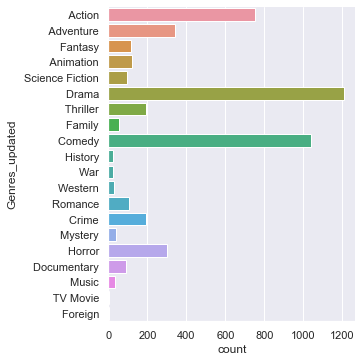

In [15]:
#Genres in the dataset
print("Number of Genres : ", len(movies_clean["Genres_updated"].unique()))

#Different types of genres
print(movies_clean["Genres_updated"].value_counts())
sb.catplot(y = "Genres_updated", data = movies_clean, kind = "count")
